In [0]:

from IPython.display import Image
from IPython.core.display import HTML 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
## training data
# Sequence classification 
# features
sentences = ["camera is good",
             "battery is bad"]
# targets
targets = [1,0]


# # Sequence tagging 
# # features
# sentences = ["camera is good",
#              "battery is bad"]

# tag = [[ATTR, NAATTR, NAATTR] ,
#        [ATTR, NAATTR, NAATTR]]

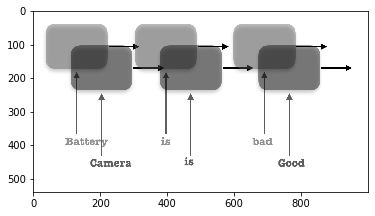

In [0]:
image = mpimg.imread("1.jpg")
plt.imshow(image)
plt.show()

# **how do you input sentences to rnn?
# **do you pass words as a string or you pass corresponding vectors?
# **given these two sentences how many unique vecors will be there?

In [0]:
# let's take some random vectors for these words
# Step 1: define dimension of these vectors ==> dimension = 4
# Step 2: define random vectors of 4 dimenstion for each word
# . .     camera  = [0.1, 0.2, 0.3, 0.4]
# . .     is      = [0.6, 0.1, 0.5, 0.4]
# . .     good    = [0.5, 0.3, 0.3, 0.2]
# . .     battery = [0.4, 0.5, 0.3, 0.5]
# . .     bad     = [0.2, 0.6, 0.3, 0.4]

# **can we define this as matrix where row represents vector for a particular word?
embedding_matrix = [
                 [0.1, 0.2, 0.3, 0.4],   
                 [0.6, 0.1, 0.5, 0.4],
                 [0.5, 0.3, 0.3, 0.2],
                 [0.4, 0.5, 0.3, 0.5],
                 [0.2, 0.6, 0.3, 0.4]
]

# **what is the shape of this matrix?
# shape = (5,4) = (vocab_size, dimension)
# **how we came up with this shape?
dimension = 4
vocab = []
for sen in sentences:
  sen = sen.lower().split()
  for word in sen:
    if word not in vocab:
      vocab.append(word)
vocab_size = len(vocab)
print("Vocab :: ",vocab)
print("Vocab size ::",vocab_size)

Vocab ::  ['camera', 'is', 'good', 'battery', 'bad']
Vocab size :: 5


In [0]:
# Creating vectors matrix in tensorflow
import tensorflow as tf
tf.reset_default_graph()
tf_embedding_matrix = tf.Variable(embedding_matrix)

In [0]:
import numpy as np
# **how can we represent these individual samples using these random vectors?
# step 1: consider a sample
example_sentence = "battery is bad"
# step 2: List all the words present in it
example_sen_words = ["battery", "is", "bad"]
# step 3: Find the index of individual word in embedding matrix
example_sen_indices = [3, 1, 4]
# step 4: using this index represent individual sample
example_sen_vector = [[0.4, 0.5, 0.3, 0.5], [0.6, 0.1, 0.5, 0.4], [0.2, 0.6, 0.3, 0.4]]

# ** How we can get these vectors for all the samples using tensorflow?
# For single example
example_sen_indices = tf.placeholder(dtype=tf.int32, shape=[None])
sample_to_vec = tf.nn.embedding_lookup(tf_embedding_matrix, example_sen_indices)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  feed_dict = {example_sen_indices:[3,1,4]}
  sample_vec_repres = sess.run(sample_to_vec, feed_dict)
  #print(sample_vec_repres)

# For multiple example
sentences = ["camera is good",
             "battery is bad"]
example_sen_indices = [[0,1,2], [3,1,4]]
example_sen_indices = tf.placeholder(dtype=tf.int32, shape=[None,None])
sample_to_vec = tf.nn.embedding_lookup(tf_embedding_matrix, example_sen_indices)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  feed_dict = {example_sen_indices:[[0,1,2], [3,1,4]]}
  sample_vec_repres = sess.run(sample_to_vec, feed_dict)
  print(sample_vec_repres)
  print(np.array(sample_vec_repres).shape)

[[[0.1 0.2 0.3 0.4]
  [0.6 0.1 0.5 0.4]
  [0.5 0.3 0.3 0.2]]

 [[0.4 0.5 0.3 0.5]
  [0.6 0.1 0.5 0.4]
  [0.2 0.6 0.3 0.4]]]
(2, 3, 4)


In [0]:
# Summarizing what we did in tensorflow
import tensorflow as tf
tf.reset_default_graph()
tf_embedding_matrix = tf.Variable(embedding_matrix)

example_sen_indices = tf.placeholder(dtype=tf.int32, shape=[None,None])
sample_to_vec = tf.nn.embedding_lookup(tf_embedding_matrix, example_sen_indices)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  feed_dict = {example_sen_indices:[[0,1,2], [3,1,4]]}
  sample_vec_repres = sess.run(sample_to_vec, feed_dict)
  print(sample_vec_repres)
  print(np.array(sample_vec_repres).shape)

[[[0.1 0.2 0.3 0.4]
  [0.6 0.1 0.5 0.4]
  [0.5 0.3 0.3 0.2]]

 [[0.4 0.5 0.3 0.5]
  [0.6 0.1 0.5 0.4]
  [0.2 0.6 0.3 0.4]]]
(2, 3, 4)


In [0]:
# **Convert all samples to indices
word_to_id = {vocab[word_id]:word_id for word_id in range(len(vocab))}
print("Vocab ",vocab)
print("word_to_id", word_to_id)
numerized_features = []
for sen in sentences:
  sen = sen.lower().split()
  sen = [word_to_id[word] for word in sen]
  numerized_features.append(sen)
print("Numerized data :",numerized_features)

Vocab  ['camera', 'is', 'good', 'battery', 'bad']
word_to_id {'camera': 0, 'is': 1, 'good': 2, 'battery': 3, 'bad': 4}
Numerized data : [[0, 1, 2], [3, 1, 4]]


In [0]:
# tensorflow complete code
import tensorflow as tf
tf.reset_default_graph()
tf_embedding_matrix = tf.Variable(embedding_matrix)

example_sen_indices = tf.placeholder(dtype=tf.int32, shape=[None,None])
sample_to_vec = tf.nn.embedding_lookup(tf_embedding_matrix, example_sen_indices)
rnn_cell = tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=3)
outputs_for_tagging, output_for_classification = tf.nn.dynamic_rnn(cell=rnn_cell, inputs=sample_to_vec, dtype=tf.float32)

classification_logits = tf.squeeze(tf.contrib.layers.fully_connected(output_for_classification, 1, activation_fn=tf.sigmoid))
classification_targets = tf.placeholder(dtype=tf.float32 ,shape=[None])
classification_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=classification_targets, logits=classification_logits))
train_op = tf.train.AdamOptimizer(0.5).minimize(classification_loss)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(5):
    print("epoch ::",epoch)
    feed_dict = {example_sen_indices:numerized_features, classification_targets:targets}
    out_tag, out_class,cl_logits, cl_loss,op, = sess.run([outputs_for_tagging, output_for_classification, classification_logits, classification_loss, train_op], feed_dict)
    # print("Input::")
    # print(numerized_features)
    # print(np.array(numerized_features).shape)
    # print("Rnn tag outputs::")
    # print(out_tag)
    # print(np.array(out_tag).shape)
    # print("Rnn final outputs::")
    # print(out_class)
    print(np.array(out_class).shape)
    print("Classification loggits",cl_logits)
    print("Loss :",cl_loss)
    # print()

epoch :: 0
(2, 3)
Classification loggits [0.73019654 0.6802319 ]
Loss : 0.7416439
epoch :: 1
(2, 3)
Classification loggits [0.69826716 0.09293769]
Loss : 0.5722284
epoch :: 2
(2, 3)
Classification loggits [0.92071885 0.02024899]
Loss : 0.519266
epoch :: 3
(2, 3)
Classification loggits [0.9623816 0.0075053]
Loss : 0.5102128
epoch :: 4
(2, 3)
Classification loggits [0.98229814 0.00299988]
Loss : 0.5063508


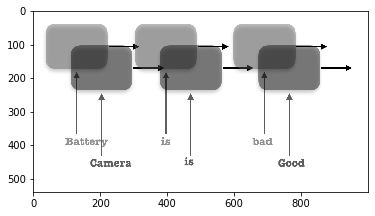

In [0]:
image = mpimg.imread("1.jpg")
plt.imshow(image)
plt.show()

In [0]:
# # Sequence tagging 
# # features
sentences = ["camera is good",
             "battery is bad"]

tag = [["ATTR", "NAATTR", "NAATTR"] ,
       ["ATTR", "NAATTR", "NAATTR"]]

numerize_tags = [[1, 0, 0] ,
       [1, 0, 0]]

numerize_tags = []
for t in tag:
  temp = []
  for step in t:
    if step=="ATTR":
      temp.append(1)
    else:
      temp.append(0)
  numerize_tags.append(temp)
numerize_tags

[[1, 0, 0], [1, 0, 0]]

In [0]:
# tensorflow complete code
import tensorflow as tf
tf.reset_default_graph()
tf_embedding_matrix = tf.Variable(tf.random_uniform(shape=(vocab_size,dimension)), trainable=True)

example_sen_indices = tf.placeholder(dtype=tf.int32, shape=[None,None])
sample_to_vec = tf.nn.embedding_lookup(tf_embedding_matrix, example_sen_indices)
rnn_cell = tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=3)
#rnn_cell = tf.compat.v1.nn.rnn_cell.LSTMCell(num_units=3)
outputs_for_tagging, output_for_classification = tf.nn.dynamic_rnn(cell=rnn_cell, inputs=sample_to_vec, dtype=tf.float32)

tagging_logits = tf.squeeze(tf.contrib.layers.fully_connected(outputs_for_tagging, 1, activation_fn=tf.sigmoid))
tagging_targets = tf.placeholder(dtype=tf.float32 ,shape=[None,None])
tagging_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tagging_targets, logits=tagging_logits))
train_op = tf.train.AdamOptimizer(0.5).minimize(tagging_loss)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(5):
    print("epoch ::",epoch)
    feed_dict = {example_sen_indices:numerized_features, tagging_targets:numerize_tags}
    out_tag, out_class,cl_logits, cl_loss,op, = sess.run([outputs_for_tagging, output_for_classification, tagging_logits, tagging_loss, train_op], feed_dict)
    # print("Input::")
    # print(numerized_features)
    # print(np.array(numerized_features).shape)
    # print("Rnn tag outputs::")
    # print(out_tag)
    # print(np.array(out_tag).shape)
    # print("Rnn final outputs::")
    # print(out_class)
    print(np.array(out_tag).shape)
    print("Tagging loggits",cl_logits)
    print("Loss :",cl_loss)
    # print()

epoch :: 0
(2, 3, 3)
Tagging loggits [[0.47821486 0.3836989  0.33766246]
 [0.46723592 0.370164   0.36162794]]
Loss : 0.7556436
epoch :: 1
(2, 3, 3)
Tagging loggits [[0.07799806 0.04936483 0.04984235]
 [0.09403614 0.04944668 0.04940387]]
Loss : 0.695831
epoch :: 2
(2, 3, 3)
Tagging loggits [[0.37791288 0.01051408 0.01038268]
 [0.60971856 0.01065676 0.01038134]]
Loss : 0.62493396
epoch :: 3
(2, 3, 3)
Tagging loggits [[0.97619855 0.00324161 0.00317064]
 [0.9770867  0.00324049 0.00317068]]
Loss : 0.5697
epoch :: 4
(2, 3, 3)
Tagging loggits [[0.99077296 0.00109373 0.00108656]
 [0.99078196 0.00109373 0.00108656]]
Loss : 0.5677117


In [0]:
# sequence classification
# sequence tagging
# multi task models

In [0]:
# tensorflow complete code
import tensorflow as tf
tf.reset_default_graph()
tf_embedding_matrix = tf.Variable(tf.random_uniform(shape=(vocab_size,dimension)), trainable=True)

example_sen_indices = tf.placeholder(dtype=tf.int32, shape=[None,None])
sample_to_vec = tf.nn.embedding_lookup(tf_embedding_matrix, example_sen_indices)
rnn_cell = tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=3)
outputs_for_tagging, output_for_classification = tf.nn.dynamic_rnn(cell=rnn_cell, inputs=sample_to_vec, dtype=tf.float32)

classification_logits = tf.squeeze(tf.contrib.layers.fully_connected(output_for_classification, 1, activation_fn=tf.sigmoid))
classification_targets = tf.placeholder(dtype=tf.float32 ,shape=[None])
classification_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=classification_targets, logits=classification_logits))


tagging_logits = tf.squeeze(tf.contrib.layers.fully_connected(outputs_for_tagging, 1, activation_fn=tf.sigmoid))
tagging_targets = tf.placeholder(dtype=tf.float32 ,shape=[None,None])
tagging_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tagging_targets, logits=tagging_logits))

total_loss = classification_loss+tagging_loss
train_op = tf.train.AdamOptimizer(0.5).minimize(total_loss)


with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(20):
    print("epoch ::",epoch)
    feed_dict = {example_sen_indices:numerized_features, tagging_targets:numerize_tags, classification_targets:targets}
    out_tag, out_class,cl_logits,tag_logits, total_loss_,op, = sess.run([outputs_for_tagging, output_for_classification,classification_logits, tagging_logits, total_loss, train_op], feed_dict)
    # print("Input::")
    # print(numerized_features)
    # print(np.array(numerized_features).shape)
    # print("Rnn tag outputs::")
    # print(out_tag)
    # print(np.array(out_tag).shape)
    # print("Rnn final outputs::")
    # print(out_class)
    print(np.array(cl_logits).shape)
    print("Classification loggits",cl_logits)
    print("Tagging loggits",tag_logits)
    print("Loss :",total_loss_)
    print("")

epoch :: 0
(2,)
Classification loggits [0.7318974  0.77862203]
Tagging loggits [[0.71900374 0.83299524 0.8210427 ]
 [0.70772934 0.76931727 0.8544338 ]]
Loss : 1.6972574

epoch :: 1
(2,)
Classification loggits [0.343142 0.314973]
Tagging loggits [[0.22553237 0.2779155  0.22645816]
 [0.18755707 0.26106575 0.1866994 ]]
Loss : 1.4442716

epoch :: 2
(2,)
Classification loggits [0.46762416 0.18210274]
Tagging loggits [[0.17951131 0.14200272 0.32414448]
 [0.13340575 0.13923311 0.13745749]]
Loss : 1.3707917

epoch :: 3
(2,)
Classification loggits [0.593295   0.06742543]
Tagging loggits [[0.15423861 0.05283591 0.30497926]
 [0.04906786 0.10779513 0.04986573]]
Loss : 1.3056372

epoch :: 4
(2,)
Classification loggits [0.78641605 0.03823699]
Tagging loggits [[0.10629923 0.02583925 0.17820041]
 [0.02529561 0.03839418 0.0254391 ]]
Loss : 1.2493613

epoch :: 5
(2,)
Classification loggits [0.9197051  0.02433652]
Tagging loggits [[0.07588049 0.01458863 0.08759023]
 [0.01453241 0.01550473 0.01455868]]
Lo